In [29]:
df=pd.read_csv("dataset.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


HANDLING MISSING VALUES

In [30]:
df=df.replace(r'^\s*$',pd.NA,regex=True).dropna()
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [31]:
ip=df.drop("Play Tennis",axis=1)
ip

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [32]:
from sklearn.preprocessing import LabelEncoder
outlook_le=LabelEncoder()
temperature_le=LabelEncoder()
humidity_le=LabelEncoder()
wind_le=LabelEncoder()

In [33]:
ip["Outlook_new"]=outlook_le.fit_transform(ip["Outlook"])
ip["Temperature_new"]=temperature_le.fit_transform(ip["Temperature"])
ip["Humidity_new"]=humidity_le.fit_transform(ip["Humidity"])
ip["Wind_new"]=wind_le.fit_transform(ip["Wind"])
ip

,Outlook,Temperature,Humidity,Wind,Outlook_new,Temperature_new,Humidity_new,Wind_new
0,Sunny,Hot,High,Weak,2,1,0,1
1,Sunny,Hot,High,Strong,2,1,0,0
2,Overcast,Hot,High,Weak,0,1,0,1
3,Rain,Mild,High,Weak,1,2,0,1
4,Rain,Cool,Normal,Weak,1,0,1,1
5,Rain,Cool,Normal,Strong,1,0,1,0
6,Overcast,Cool,Normal,Strong,0,0,1,0
7,Sunny,Mild,High,Weak,2,2,0,1
8,Sunny,Cool,Normal,Weak,2,0,1,1
9,Rain,Mild,Normal,Weak,1,2,1,1


In [34]:
new_ip=ip.drop(["Outlook","Temperature","Humidity","Wind"],axis=1)
new_ip

,Outlook_new,Temperature_new,Humidity_new,Wind_new
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [35]:
target=df["Play Tennis"]
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [36]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
model.fit(new_ip,target)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
model.score(new_ip,target)

1.0

In [39]:
model.predict([[2,1,0,1]])

c:\Users\edwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [40]:
model.predict([[1,1,0,2]])

c:\Users\edwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

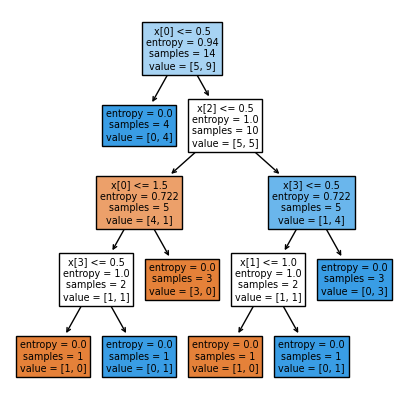

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
tree.plot_tree(model,filled=True)

In [42]:
tree.export_text(model)

'|--- feature_0 <= 0.50\n|   |--- class: Yes\n|--- feature_0 >  0.50\n|   |--- feature_2 <= 0.50\n|   |   |--- feature_0 <= 1.50\n|   |   |   |--- feature_3 <= 0.50\n|   |   |   |   |--- class: No\n|   |   |   |--- feature_3 >  0.50\n|   |   |   |   |--- class: Yes\n|   |   |--- feature_0 >  1.50\n|   |   |   |--- class: No\n|   |--- feature_2 >  0.50\n|   |   |--- feature_3 <= 0.50\n|   |   |   |--- feature_1 <= 1.00\n|   |   |   |   |--- class: No\n|   |   |   |--- feature_1 >  1.00\n|   |   |   |   |--- class: Yes\n|   |   |--- feature_3 >  0.50\n|   |   |   |--- class: Yes\n'

[Text(0.4444444444444444, 0.9, 'Outlook_new <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = No'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'),
 Text(0.5555555555555556, 0.7, 'Humidity_new <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Yes'),
 Text(0.3333333333333333, 0.5, 'Outlook_new <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Yes'),
 Text(0.2222222222222222, 0.3, 'Wind_new <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'),
 Text(0.7777777777777778, 0.5, 'Wind_new <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'),
 Text(0.6666666666666666, 0.3, 'Temperature_new <= 1.0\nentropy = 1.0\nsamples = 2\

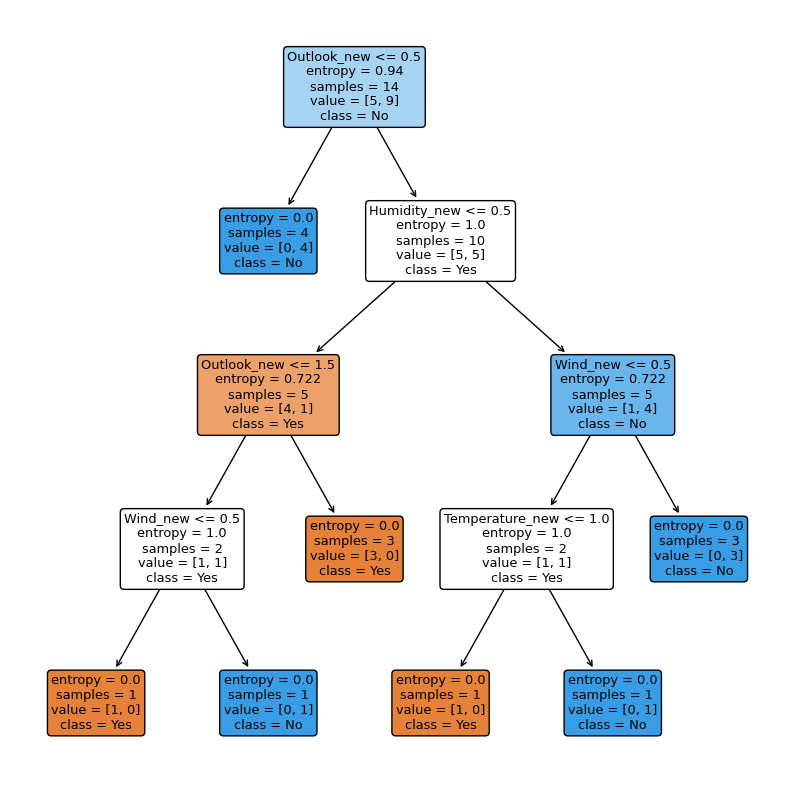

In [43]:
plt.figure(figsize=(10,10))
feature_cols=["Outlook_new","Temperature_new","Humidity_new","Wind_new"]
tree.plot_tree(model,class_names=['Yes','No'],filled=True,rounded=True,feature_names=feature_cols,max_depth=4)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(new_ip,target,test_size=0.2,random_state=110)

In [46]:
len(X_train)

11

In [47]:
len(X_test)

3

ACCURACY CALCULATION

In [48]:
from sklearn import metrics

In [49]:
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
clf=model.fit(X_train,Y_train)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred=clf.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes'], dtype=object)

In [52]:
clf.score(X_train,Y_train)

1.0

In [53]:
print(metrics.accuracy_score(Y_test,y_pred))

0.6666666666666666


[Text(0.6, 0.9, 'Humidity_new <= 0.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = No'),
 Text(0.4, 0.7, 'Outlook_new <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]\nclass = Yes'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = No'),
 Text(0.6, 0.5, 'Outlook_new <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Yes'),
 Text(0.4, 0.3, 'Wind_new <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.8, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes'),
 Text(0.8, 0.7, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = No')]

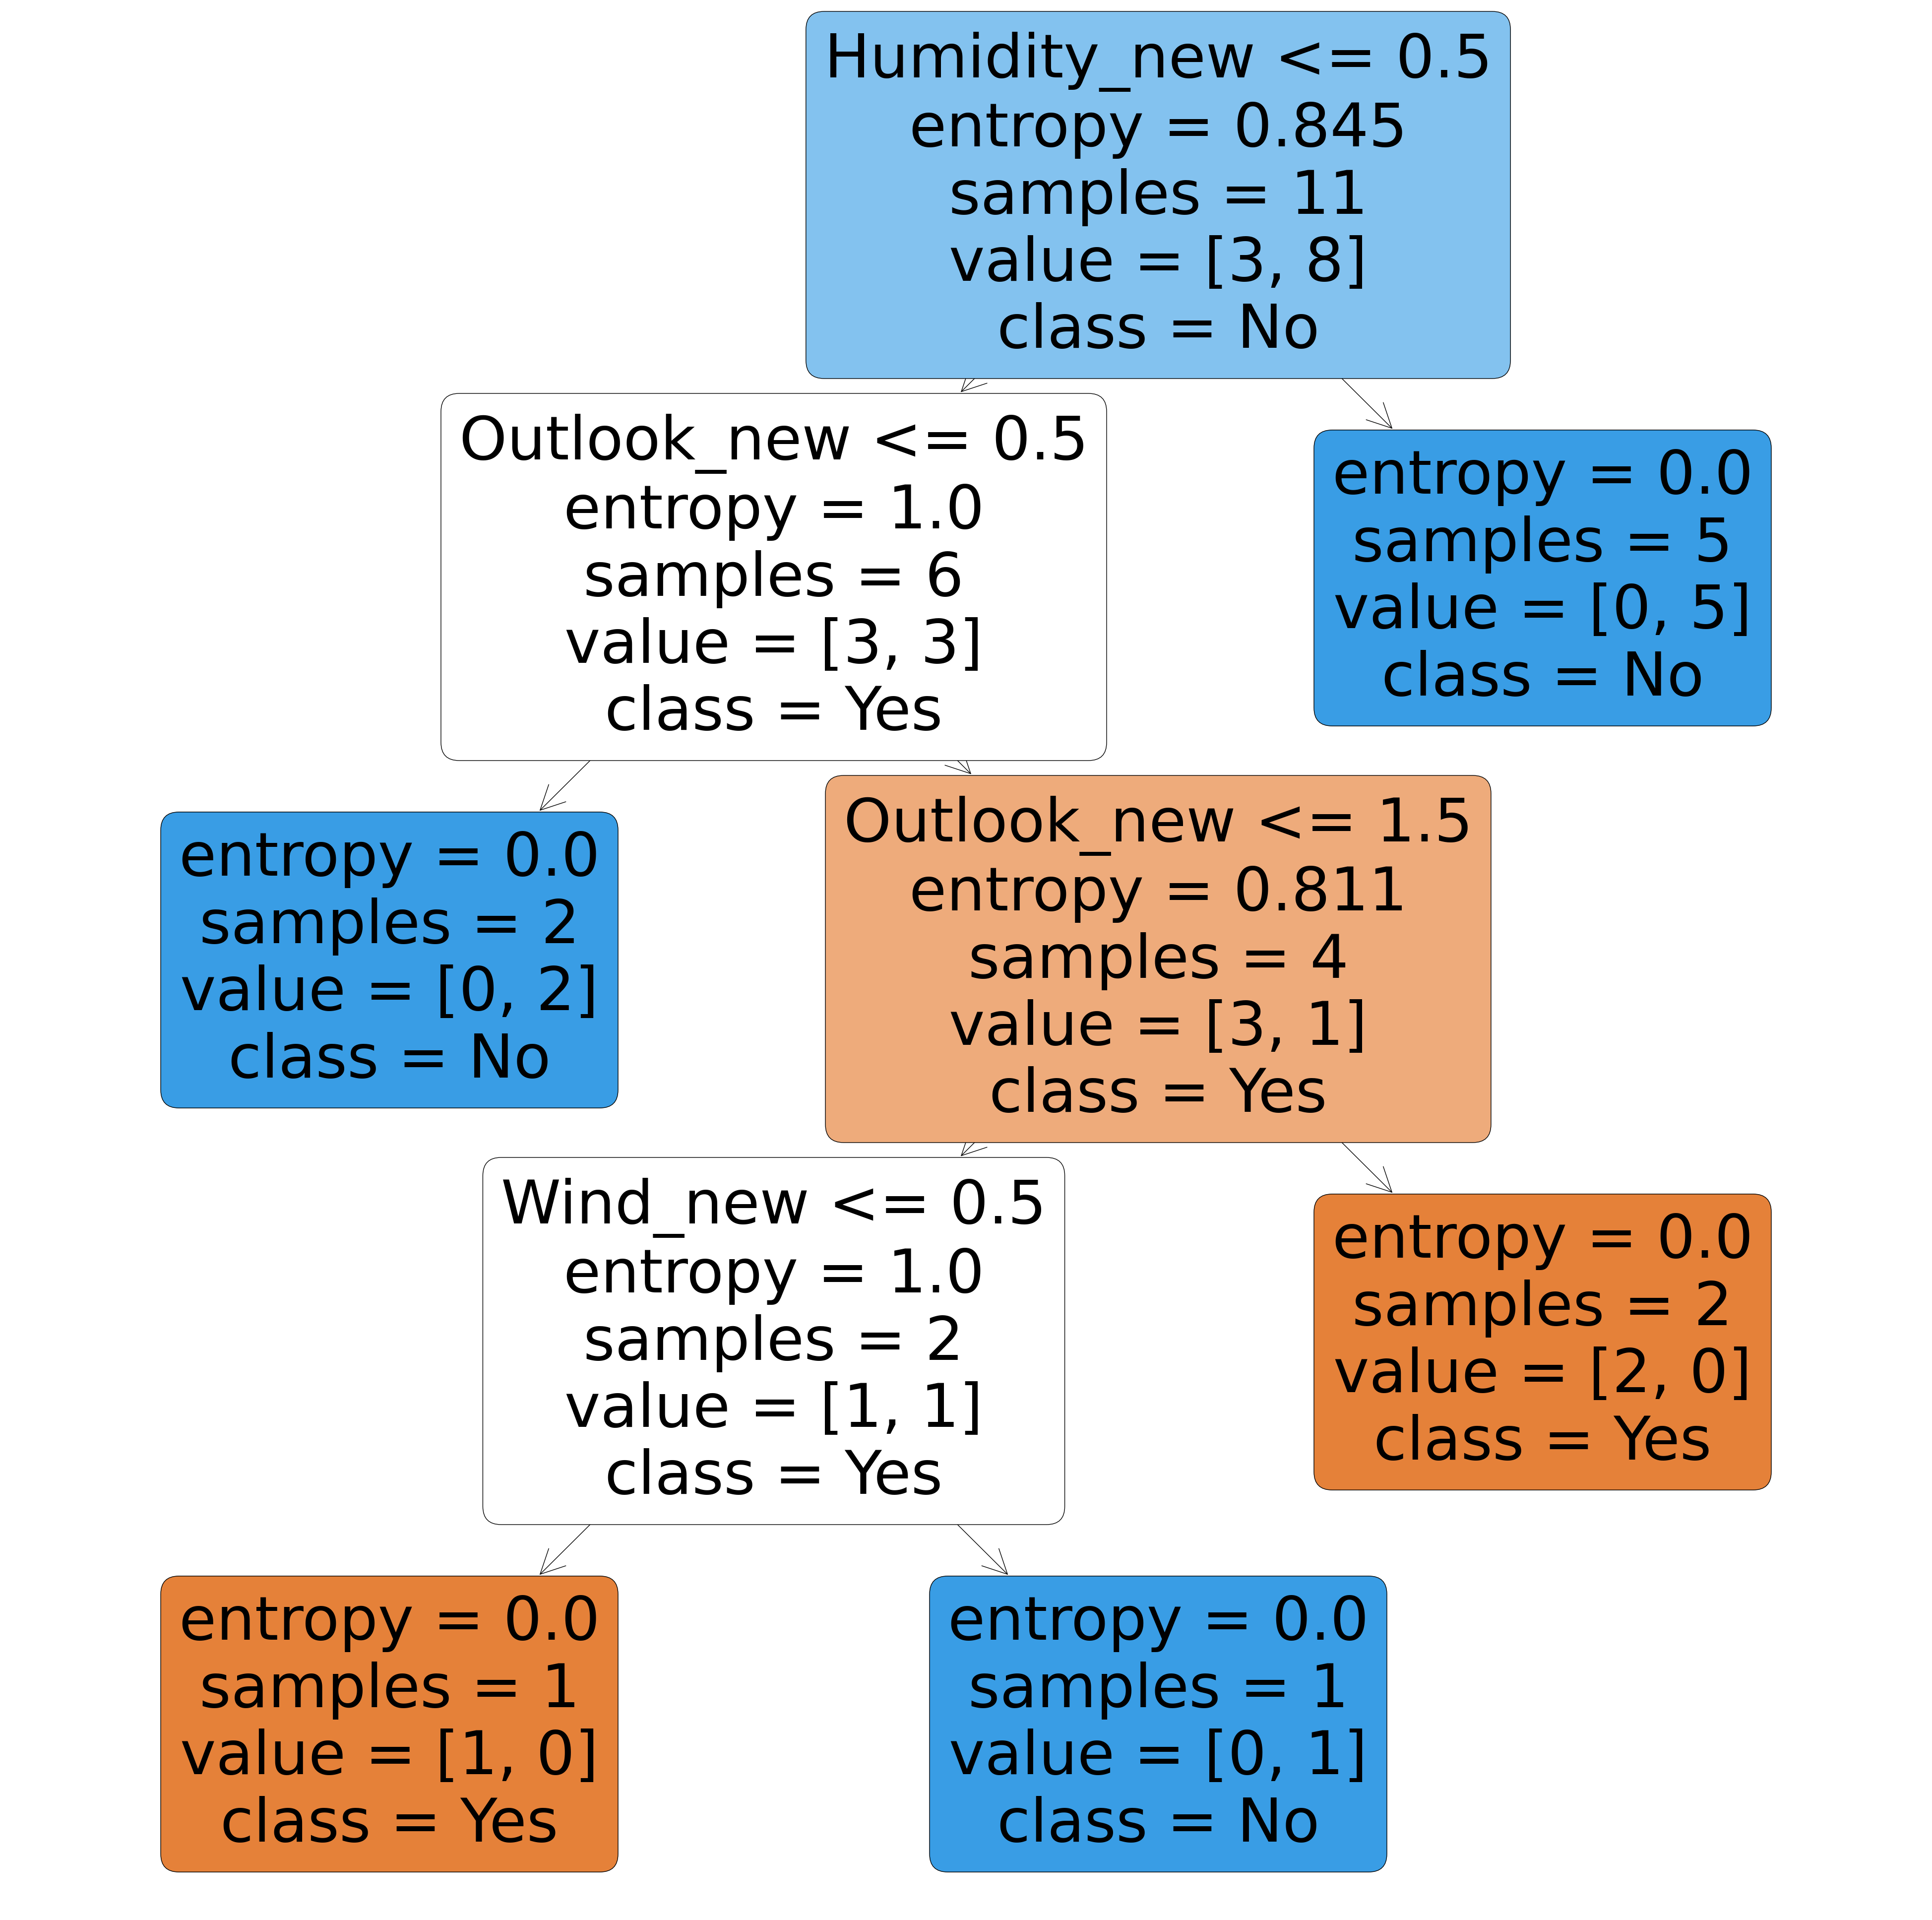

In [54]:
plt.figure(figsize=(50,50))
feature_cols=["Outlook_new","Temperature_new","Humidity_new","Wind_new"]
tree.plot_tree(clf,class_names=['Yes','No'],filled=True,rounded=True,feature_names=feature_cols,max_depth=4)

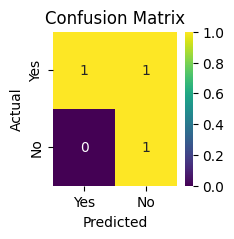

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', 
            xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()